In [13]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
df.shape

(5110, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


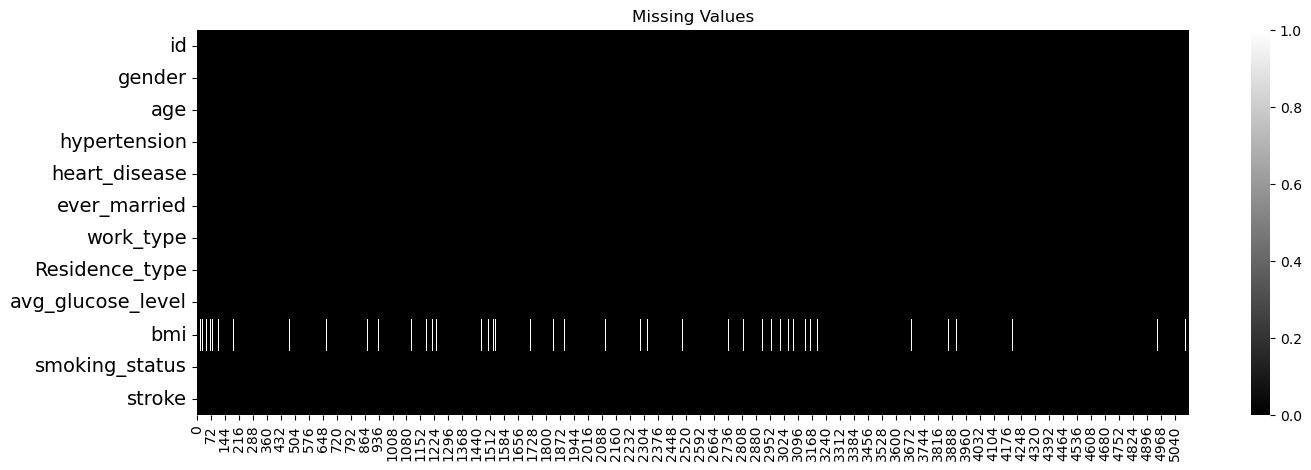

In [27]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))
hm = sns.heatmap(df.T.isna(), cmap='binary_r')
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 14)
ax.set_title('Missing Values')
plt.show()

In [28]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


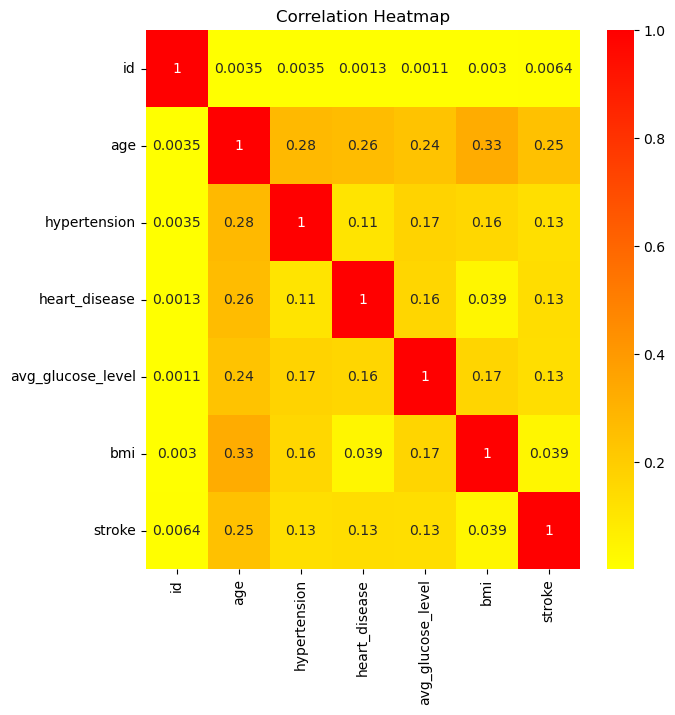

In [29]:
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(numeric_df.corr().abs(), annot=True, cmap="autumn_r")
plt.title("Correlation Heatmap")
plt.show()

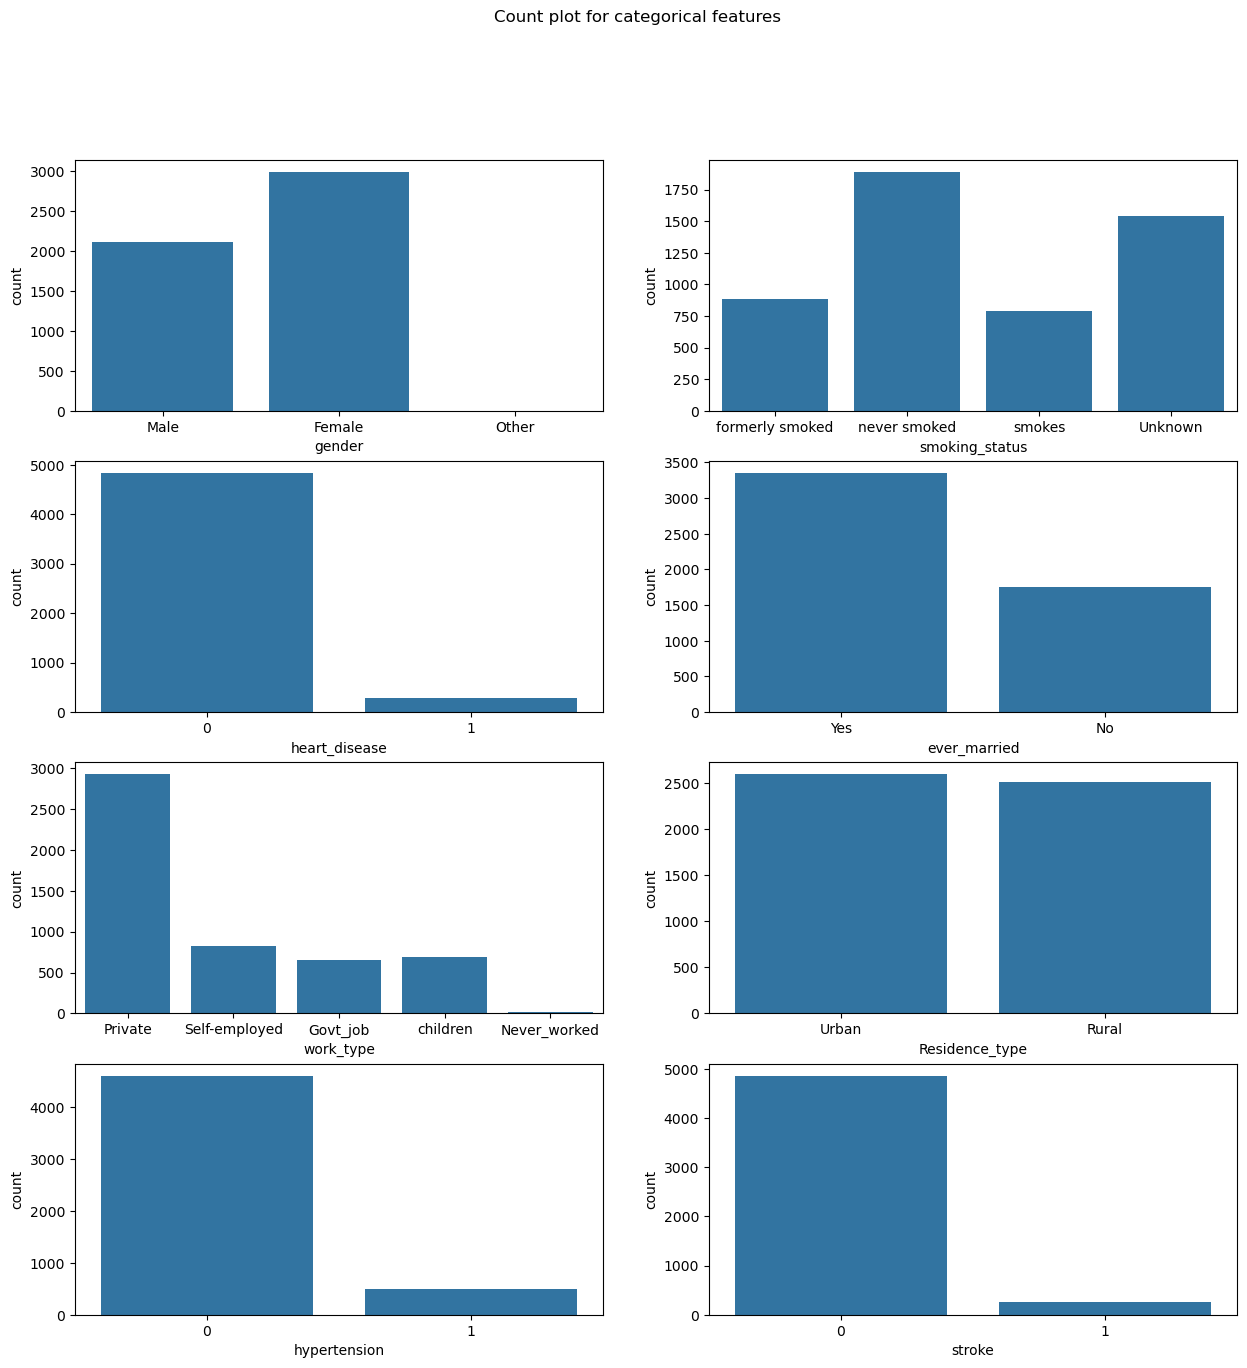

In [30]:
fig,axes = plt.subplots(4,2,figsize = (15,15))
fig.suptitle("Count plot for categorical features")
#gender
sns.countplot(ax=axes[0,0],data=df,x='gender')
#smoking_status
sns.countplot(ax=axes[0,1],data=df,x='smoking_status')
#heart_disease
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
#ever_married
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
#work_type
sns.countplot(ax=axes[2,0],data=df,x='work_type')
#Residence_type
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
#hypertension
sns.countplot(ax=axes[3,0],data=df,x='hypertension')
#stroke
sns.countplot(ax=axes[3,1],data=df,x='stroke')
plt.show()

In [31]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


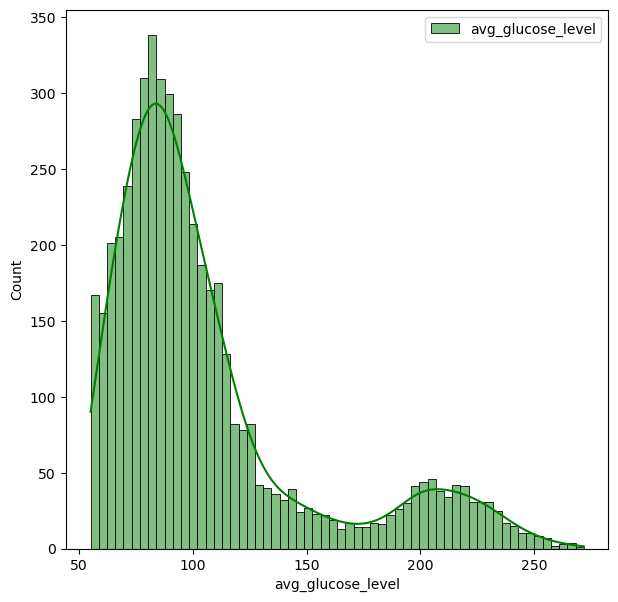

In [32]:
fig = plt.figure(figsize=(7,7))
sns.histplot(df.avg_glucose_level,color='green',label='avg_glucose_level',kde=True,bins=60)
plt.legend()

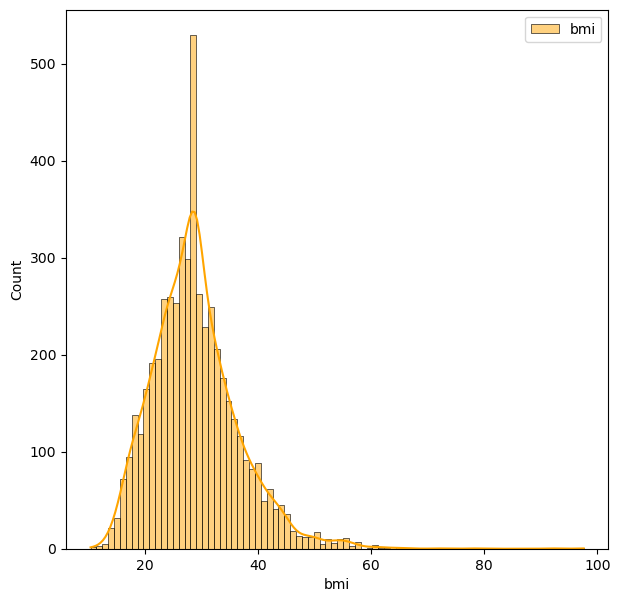

In [33]:
fig = plt.figure(figsize=(7,7))
sns.histplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

In [34]:
df['avg_glucose_level'] = np.log(df['avg_glucose_level'])


In [35]:
df = df.drop('id',axis=1)

In [36]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [37]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
#Categorical columns
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,5.432367,36.600000,1,1
1,0,61.0,0,0,1,3,0,5.309307,28.893237,2,1
2,1,80.0,0,1,1,2,0,4.662684,32.500000,2,1
3,0,49.0,0,0,1,2,1,5.143008,34.400000,3,1
4,0,79.0,1,0,1,3,0,5.159745,24.000000,2,1


In [41]:
X = df.drop(['stroke'],axis=1)
Y = df['stroke']

print('X Shape', X.shape)
print('Y Shape',Y.shape)

X Shape (5109, 10)
Y Shape (5109,)


In [42]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

In [43]:
X, Y = SMOTE().fit_resample(X=X,y=Y)

In [44]:
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9],  # 10% minority, 90% majority
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Print class distribution before resampling
from collections import Counter
print("Before SMOTE:", Counter(y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution after resampling
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({1: 900, 0: 100})
After SMOTE: Counter({1: 900, 0: 900})


In [46]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

In [47]:
print('X Shape', X.shape)
print('Y Shape',Y.shape)

X Shape (1000, 5)
Y Shape (9720,)


In [48]:
# Check the column names in the DataFrame
print(df.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


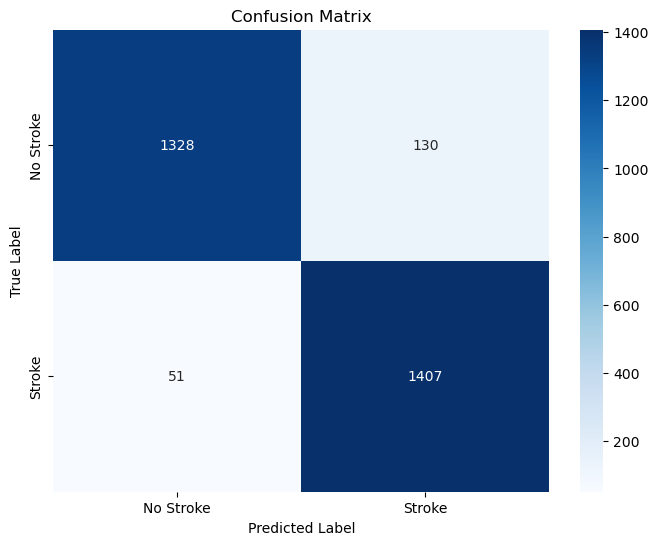

In [49]:
# Ensure X and Y are defined from the original dataset, not overwritten by `make_classification`
X = df.drop('stroke', axis=1)
Y = df['stroke']

# Apply SMOTE for balancing the classes
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, Y)

# Step 1: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 2: Initialize and train the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 4: Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Step 5: Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
